<a href="https://colab.research.google.com/github/nickwotton/MQP2019/blob/master/Nick/BSM_formula_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BSM formula

## Abstract

- create GBM class
- define a method for BSM formula for a given option type
- consider and cest for possible relationships between parameters and call option price

## Analysis

BS model assumes the distribution of stock as lognormal. In particular, it writes 
$$\ln \frac{S(T)}{S(0)} \sim \mathcal N((r  - \frac 1 2 \sigma^2) T, \sigma^2 T)$$
with respect to risk neutral measure. In the above, the parameters stand for

* $S(0)$: The initial stock price
* $S(T)$: The stock price at $T$
* $r$: interest rate
* $\sigma$: volatility




The call and put price with maturity $T$ and strike price $K$ will be known as $C_0$ and $P_0$ given as below:
$$C_0 = \mathbb E [e^{-rT} (S(T) - K)^+] = S_0  \Phi(d_1) - K e^{-rT} \Phi(d_2),$$
and 
$$P_0 = \mathbb E [e^{-rT} (S(T) - K)^-] = K e^{-rT} \Phi(- d_2) - S_0  \Phi(- d_1),$$
where $d_i$ are given as
$$d_1 = \frac{1}{\sigma\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r + \frac{\sigma^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right],$$
and
$$d_2 = \frac{1}{\sigma\sqrt{\left( T - t \right)}}
        \left[
          \ln\frac{S_{0}}{K}
          +
          \left(
            r - \frac{\sigma^2}{2}
          \right)
          \left(
            T-t
          \right)
        \right] = d_{1}-\sigma\sqrt{\left( T - t \right)}$$

(From $\textit{Stochastic Calculus for Finance II Continuous Time Models}$ by Shreve)


Put-call parity will be useful:
    $$C_0 - P_0 =  S(0) - e^{-rT} K.$$


## BSM Formula and Option Pricing

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

We reload the european option class created before.

In [0]:
'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype               # Put or Call
      self.strike = strike             # Strike K
      self.maturity = maturity         # Maturity T
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return np.max([0, (s - k)*otype])

Observe the defined Payoff function above. Mathemtacially, we have the Payoff for an option at time $t$ is:

Call Options:
$P_{Call}(t)=max\{0, S_{t} - K\}$

Put Options:
$P_{Put}(t)=max\{0, K-S_{t}\}$

Graphically, we have the payoffs for Call and Put respectively:

![European Call Option Payoff](https://drive.google.com/uc?id=1ZJfxv17b_nfhOegJmGdeydvz1xfGgezI) 
![European Put Option Payoff](https://drive.google.com/uc?id=1zLRjiHym9md5QBQbrpalZM3TosrADAbh)

Next, we create the Geometric Brownian Motion (gbm) class, which is 
determined by three parameters. We shall initialize it
as it  is created.

In [0]:
'''============
Gbm class inherited from sde_1d
============='''

class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

BSM formula is given by a method of Gbm class with an input of an option.

In [0]:
'''========
Black-Scholes-Merton formula. 
=========='''

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = 1/(sigma*np.sqrt(maturity))*(np.log(s0/k) + (r + np.power(sigma,2)/2)*(maturity)) 
    d2 = 1/(sigma*np.sqrt(maturity))*(np.log(s0/k) + (r - np.power(sigma,2)/2)*(maturity)) 
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [0]:
'''===============
Test bsm_price
================='''
gbm1 = Gbm()
option1 = VanillaOption()
print('>>>>>>>>>>call value is ' + str(gbm1.bsm_price(option1)))
option2 = VanillaOption(otype=-1)
print('>>>>>>>>>>put value is ' + str(gbm1.bsm_price(option2)))


>>>>>>>>>>call value is 5.943273183452845
>>>>>>>>>>put value is 10.84042522804176


## Search for Trends
### Vary Underlying Asset Price $S_0$
Now we will calculate the Call price for options with the same strike price $K$ but different underlying values $S_0$.


<function matplotlib.pyplot.show>

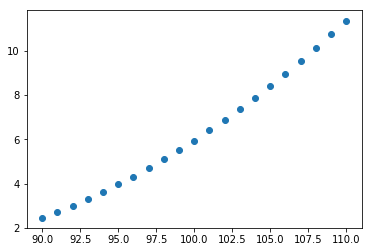

In [0]:
# Define a new GBM
gbm2 = Gbm()

'''=============
Vary Underlying price between 90 and 110
=============='''
underlyingPrice = []      # Array of Underlying values s0 that will be used to plot
optionPrice = []          # Array of Call option prices for associated s0
for i in range(90, 111):  # Iterate from 90 to 110 stepping up by 1 
  gbm2.init_state = i
  callPrice = gbm2.bsm_price(option1)
  underlyingPrice.append(i)
  optionPrice.append(callPrice)

# Print the Plot
plt.scatter(underlyingPrice, optionPrice)
plt.show  

This seems to imply the relationship between the price of the underlying asset and the value of the Call option are related exponentially. Next we examine the effect of smaller changes in the underlying asset.

<function matplotlib.pyplot.show>

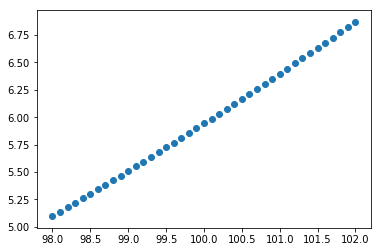

In [0]:
# Define a new GBM
gbm3 = Gbm()

'''=============
Vary Underlying price between 98 and 102
  With step size 0.1
=============='''
underlyingPrice = []        # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(980, 1021):  # Iterate from 98 to 102 stepping up by 0.1 
  j = i / 10                # Divide by 10 to get the value we want
  gbm3.init_state = j
  callPrice = gbm3.bsm_price(option1)
  underlyingPrice.append(j)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(underlyingPrice, optionPrice)
plt.show

This plot shows that the two factors may have a linear relationship, so we perform one more test.

<function matplotlib.pyplot.show>

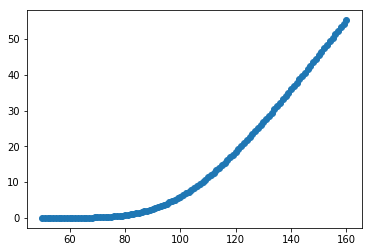

In [0]:
# Define a new GBM
gbm4 = Gbm()

'''=============
Vary Underlying price between 50 and 300
=============='''
underlyingPrice = []      # Array of Underlying values s0 that will be used to plot
optionPrice = []          # Array of Call option prices for associated s0
for i in range(50, 161):  # Iterate from 50 to 300 stepping up by 1 
  gbm4.init_state = i
  callPrice = gbm4.bsm_price(option1)
  underlyingPrice.append(i)
  optionPrice.append(callPrice)

# Print the Plot
plt.scatter(underlyingPrice, optionPrice)
plt.show

Note that this plot shows that the two factors seem to be more exponentially related than linearly.

### Vary Volatility $\sigma$
Next, we will leave the underlying price fixed at 100 and vary the volatility, $\sigma$.

<function matplotlib.pyplot.show>

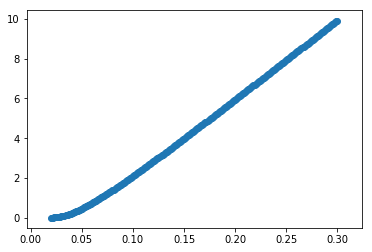

In [0]:
# Define a new GBM
gbm5 = Gbm()

'''=============
Vary Volatility between 0.01 and 0.1
=============='''
volatilities = []           # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(10, 101):    # Iterate from 0.01 to 0.1 stepping up by 0.001 
  j = i / 1000              # Divide by 1000 to get the value we want
  gbm5.vol_ratio = j
  callPrice = gbm5.bsm_price(option1)
  volatilities.append(j)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(volatilities, optionPrice)
plt.show

Again, we are seeing an exponential trend in the relationship between Volatility and Call option price. We try another example with a greater upper parameter.

<function matplotlib.pyplot.show>

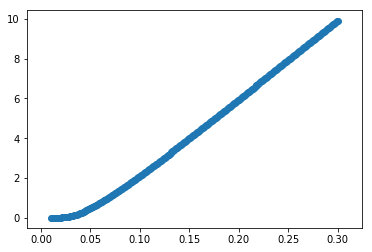

In [0]:
# Define a new GBM
gbm6 = Gbm()

'''=============
Vary Volatility between 0.01 and 0.3
  With step size 0.001
=============='''
volatilities = []           # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(10, 301):    # Iterate from 0.01 to 0.3 stepping up by 0.001 
  j = i / 1000              # Divide by 1000 to get the value we want
  gbm6.vol_ratio = j
  callPrice = gbm6.bsm_price(option1)
  volatilities.append(j)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(volatilities, optionPrice)
plt.show

This shows a mostly linear relationship beyond volatility of $0.05$. Finally, we will try another example with more data points.

<function matplotlib.pyplot.show>

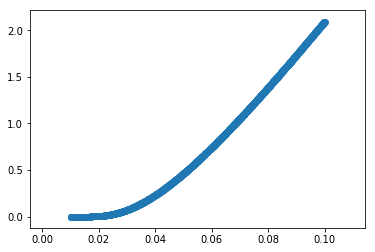

In [0]:
# Define a new GBM
gbm7 = Gbm()

'''=============
Vary Volatility between 0.01 and 0.1
  With step size 0.0001
=============='''
volatilities = []           # Array of Underlying values s0 that will be used to plot
optionPrice = []            # Array of Call option prices for associated s0
for i in range(100, 1001):  # Iterate from 0.01 to 0.1 stepping up by 0.0001 
  j = i / 10000             # Divide by 10000 to get the value we want
  gbm7.vol_ratio = j
  callPrice = gbm7.bsm_price(option1)
  volatilities.append(j)
  optionPrice.append(callPrice)

# Print the plot
plt.scatter(volatilities, optionPrice)
plt.show

All of these plots seem to enforce an exponential relationship between the Call option price and the volatility $\sigma$ while $\sigma$ is small, approximately less than $0.05$. But, when $\sigma > 0.05$, we see a more strictly linear relationship.

### Conclusion
In conclusion, this data shows that the price of the underlying asset may be exponentially related to the price of the call option on that asset. Additionally, the data shows that the volatility of a stock, $\sigma$ seems to be exponentially related to the price of a call option for $\sigma < 0.05$ and linearly related for $\sigma > 0.05$.